### Time Series Forecasting using ARIMA model

ARMA model is combination of Moving Average (MA) and autoregressive processes (AR). Hence, it not only takes past values and past errors in order to make prediction. ARMA is define by: <br>

<h1><center>$y_{t} = c_{0} + c_{1}y_{t-1} + \theta_{\epsilon-1} + \epsilon_{t}$</center></h1><br>

Where  $c_{1}y_{t-1}$ represents past values in order to make prediction & $\epsilon$ indicate the past errors taken into consideration in order to make prediction. <br>

<b> ARIMA </b> model is an extension for ARMA models which convert non stationary series into stationary series before performing time series analysis<br>

To further understand, please refer to the following link: https://www.kaggle.com/code/prashant111/arima-model-for-time-series-forecasting/notebook<br>
https://www.youtube.com/watch?v=8FCDpFhd1zk&list=PLqYFiz7NM_SMC4ZgXplbreXlRY4Jf4zBP&index=6<br><br>

<b> NOTE: </b> ARMA & ARIMA models are univariate models

In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [191]:
initial_data = pd.read_csv('MaunaLoaDailyTemps.csv')
data = initial_data

In [192]:
print("Data Shape: {}, Data Columns {}".format(data.shape, data.columns))

Data Shape: (1825, 6), Data Columns Index(['DATE', 'MinTemp', 'MaxTemp', 'AvgTemp', 'Sunrise', 'Sunset'], dtype='object')


In [131]:
data[data.notnull()].count()

DATE       1825
MinTemp    1821
MaxTemp    1821
AvgTemp    1821
Sunrise    1825
Sunset     1825
dtype: int64

In [132]:
#Since there are very few columns that contain null values so we drop those columns
data = data.dropna()
data[data.notnull()].count()

DATE       1821
MinTemp    1821
MaxTemp    1821
AvgTemp    1821
Sunrise    1821
Sunset     1821
dtype: int64

Text(0.5, 1.0, 'Average Temperature vs Time')

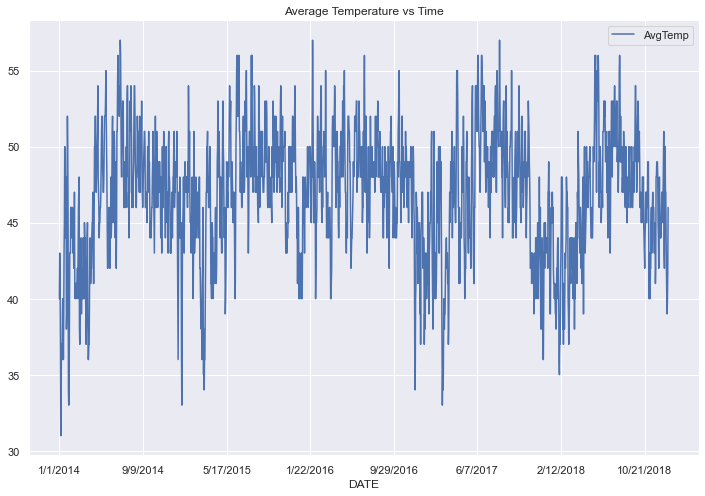

In [133]:
new_data = data[['DATE', 'AvgTemp']]
new_data = new_data.set_index('DATE')
new_data.plot(figsize=(12,8))
plt.title("Average Temperature vs Time")


### Check whether the data is Stationary

In [134]:
from statsmodels.tsa.stattools import adfuller
print("Observations of Dickey-fuller test")
dftest = adfuller(data['AvgTemp'],autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
for key,value in dftest[4].items():
    dfoutput['critical value (%s)'%key]= value
print(dfoutput)

Observations of Dickey-fuller test
Test Statistic                -6.554680e+00
p-value                        8.675937e-09
#lags used                     1.200000e+01
number of observations used    1.808000e+03
critical value (1%)           -3.433972e+00
critical value (5%)           -2.863140e+00
critical value (10%)          -2.567622e+00
dtype: float64


Since our Test Statistics is  less than than the critical values (-3.43 , -2.86 , -2.57) at different percentage. Hence, our data is stationary. Moreover, the p-value is very small. This means that our data is stationary

C:\Users\alimu\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


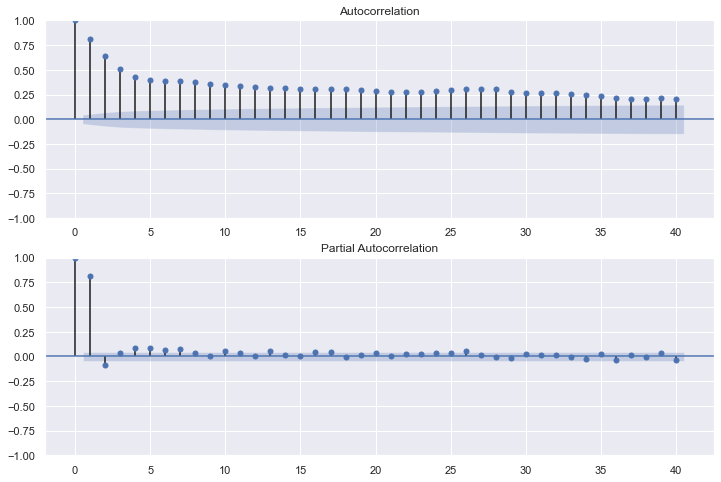

In [135]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['AvgTemp'],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['AvgTemp'],lags=40,ax=ax2)

The Autocorrelation will tell us the order of Moving Average while the Partial autocorrelation will tell us the order to Autoregression model.<br>
To understand Autocorrelation and partial autocorrelation, pls refer to the following link: https://www.machinelearningplus.com/arima/arima-forecast-test-results/<br>
<b> ARIMA(P,D,Q):</b> P -> 1<br> 
Q -> 5 (After 5th lag, the values become constant)<br> 
D -> 0 (Since data is stationary)

In [136]:
from sklearn.model_selection import train_test_split

#Index as Date
data = data.set_index('DATE')

#Split data into training and testing
training_data, test_data = train_test_split(data, train_size = 0.7, random_state = 42)
print("Training Date size: ", training_data.shape)
print("Test Data size: ", training_data.shape)


Training Date size:  (1274, 5)
Test Data size:  (1274, 5)


In [137]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(training_data['AvgTemp'], order = (1,0,5))
model = model.fit()
model.summary()

C:\Users\alimu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alimu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alimu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alimu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alimu\anaconda3\lib\site-

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1274
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -3625.052
Date:                Sat, 20 Aug 2022   AIC                           7266.104
Time:                        18:34:05   BIC                           7307.303
Sample:                             0   HQIC                          7281.577
                               - 1274                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.8073      0.136    343.138      0.000      46.540      47.075
ar.L1         -0.4400     16.220     -0.027      0.978     -32.230      31.350
ma.L1          0.4667     16.220      0.029      0.977     -31.325      32.258
ma.L2          0.0621      0.437      0.142      0.887      -0.794       0.918
ma.L3          0.0135      0.819      0.017      0.987      -1.591       1.618
ma.L4          0.0236      0.143      0.165      0.869      -0.257       0.304
ma.L5          0.0134      0.435      0.031      0.976      -0.840       0.867
sigma2        17.3384      0.684     25.341      0.000      15.997      18.679
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                53.54
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                            -0.49
Prob(H) (two-sided):                  0.16   Kurtosis:                         3.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

We want our <b> AIC </b> & <b> BIC </b> values to be as small as possible. <br>
We also look into <b> ar </b> & <b> ma </b> values. The <b> ar </b> values represent Partial autocorrelation lags we took while the <b> ma </b> values represent the Autocorrleation lags we took.<br>
To further understand them, please refer to the following link: https://www.machinelearningplus.com/arima/arima-forecast-test-results/<br><br>

We want our <b> ar </b> & <b> ma </b> values to be less than 0.05 in order to make sure that the predictions made my our model are similar to that of actual prediction. Since our <b> ar </b> & <b> ma </b> values > 0.05 so our model won't do well. However, we can still test it.

In [138]:
"""
We want to make sure that the prediction made by our model are equal to true values of test data set. So we can see how 
well our model does in terms of prediction 
"""
prediction_size = len(test_data)
predict = model.predict(prediction_size, typ='levels')
print(predict)

DATE
6/18/2018     46.694036
12/1/2017     46.646181
4/15/2014     46.960264
11/21/2015    46.488629
4/6/2017      46.857872
                ...    
2/6/2017      47.015657
7/21/2017     46.566120
5/12/2016     47.089101
1/2/2018      46.820007
2/2/2017      46.616050
Name: predicted_mean, Length: 727, dtype: float64


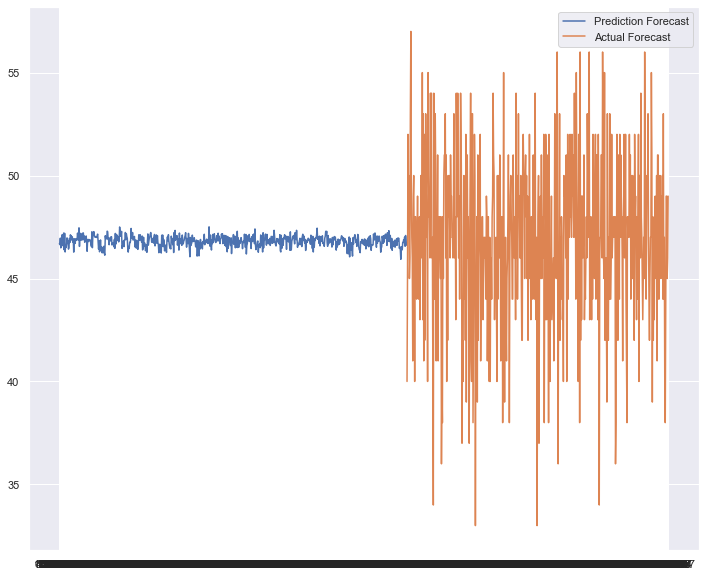

In [139]:
plt.figure(figsize=(12,10))
plt.plot(predict, label = "Prediction Forecast")
plt.plot(test_data['AvgTemp'], label = "Actual Forecast")
plt.legend()
plt.show()

We can see that our Predicted forecast values are no way closer to actual values. So we will change the values of P & Q until we get better results

In [140]:
from statsmodels.tsa.arima.model import ARIMA
model2 = ARIMA(training_data['AvgTemp'], order = (1,2,4))
model2 = model2.fit()
model2.summary()

C:\Users\alimu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alimu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alimu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alimu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alimu\anaconda3\lib\site-

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1274
Model:                 ARIMA(1, 2, 4)   Log Likelihood               -3635.314
Date:                Sat, 20 Aug 2022   AIC                           7282.627
Time:                        18:34:44   BIC                           7313.517
Sample:                             0   HQIC                          7294.230
                               - 1274                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9996      0.062    -16.173      0.000      -1.121      -0.879
ma.L1         -0.9727      3.400     -0.286      0.775      -7.636       5.691
ma.L2         -1.0256      6.616     -0.155      0.877     -13.994      11.942
ma.L3          0.9727      3.227      0.301      0.763      -5.352       7.297
ma.L4          0.0256      0.093      0.276      0.783      -0.156       0.207
sigma2        17.4426     58.336      0.299      0.765     -96.894     131.779
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                57.83
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                            -0.49
Prob(H) (two-sided):                  0.14   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

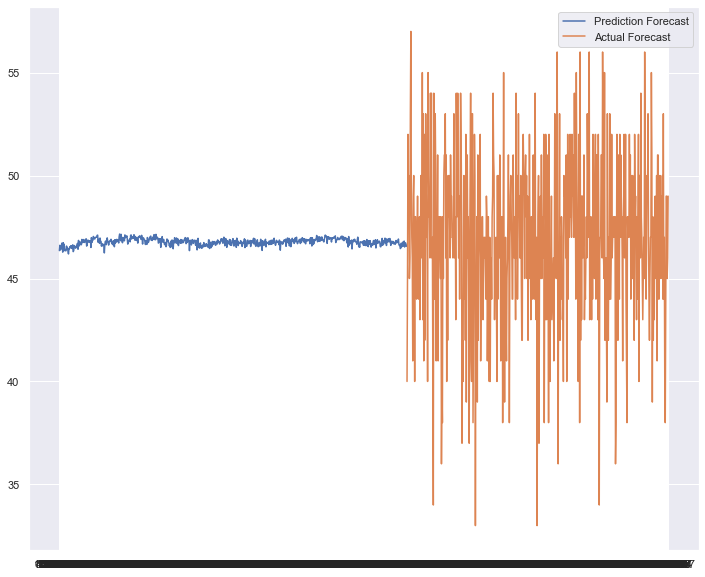

In [141]:
prediction_size = len(test_data)
predict2 = model2.predict(prediction_size, typ='levels')


plt.figure(figsize=(12,10))
plt.plot(predict2, label = "Prediction Forecast")
plt.plot(test_data['AvgTemp'], label = "Actual Forecast")
plt.legend()
plt.show()

###  Prediction of future values 

In [142]:
# We train our model for all values
model3 = ARIMA(data['AvgTemp'], order = (1,1,4))
model3 = model3.fit()
data.tail()

C:\Users\alimu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alimu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alimu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
12/26/2018,35.0,45.0,40.0,654,1752
12/27/2018,33.0,44.0,39.0,655,1752
12/28/2018,33.0,47.0,40.0,655,1753
12/29/2018,36.0,47.0,42.0,655,1753
12/30/2018,39.0,52.0,46.0,656,1754


In [143]:
#Predict the next 50 days
prediction = model3.predict(start = len(data), end = len(data) + 50, type = 'levels')
print(prediction)

1821    46.342287
1822    46.038501
1823    45.582021
1824    45.247130
1825    45.105876
1826    45.046296
1827    45.021166
1828    45.010566
1829    45.006095
1830    45.004209
1831    45.003414
1832    45.003078
1833    45.002937
1834    45.002877
1835    45.002852
1836    45.002841
1837    45.002837
1838    45.002835
1839    45.002834
1840    45.002834
1841    45.002834
1842    45.002834
1843    45.002834
1844    45.002834
1845    45.002834
1846    45.002834
1847    45.002834
1848    45.002834
1849    45.002834
1850    45.002834
1851    45.002834
1852    45.002834
1853    45.002834
1854    45.002834
1855    45.002834
1856    45.002834
1857    45.002834
1858    45.002834
1859    45.002834
1860    45.002834
1861    45.002834
1862    45.002834
1863    45.002834
1864    45.002834
1865    45.002834
1866    45.002834
1867    45.002834
1868    45.002834
1869    45.002834
1870    45.002834
1871    45.002834
Name: predicted_mean, dtype: float64


C:\Users\alimu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [144]:
#Date Range for next 50 days
from datetime import datetime
forecast_days = pd.date_range(start = '12/31/2018', end = '19/02/2019')
prediction.index = forecast_days
print(prediction)

2018-12-31    46.342287
2019-01-01    46.038501
2019-01-02    45.582021
2019-01-03    45.247130
2019-01-04    45.105876
2019-01-05    45.046296
2019-01-06    45.021166
2019-01-07    45.010566
2019-01-08    45.006095
2019-01-09    45.004209
2019-01-10    45.003414
2019-01-11    45.003078
2019-01-12    45.002937
2019-01-13    45.002877
2019-01-14    45.002852
2019-01-15    45.002841
2019-01-16    45.002837
2019-01-17    45.002835
2019-01-18    45.002834
2019-01-19    45.002834
2019-01-20    45.002834
2019-01-21    45.002834
2019-01-22    45.002834
2019-01-23    45.002834
2019-01-24    45.002834
2019-01-25    45.002834
2019-01-26    45.002834
2019-01-27    45.002834
2019-01-28    45.002834
2019-01-29    45.002834
2019-01-30    45.002834
2019-01-31    45.002834
2019-02-01    45.002834
2019-02-02    45.002834
2019-02-03    45.002834
2019-02-04    45.002834
2019-02-05    45.002834
2019-02-06    45.002834
2019-02-07    45.002834
2019-02-08    45.002834
2019-02-09    45.002834
2019-02-10    45

Text(0.5, 1.0, 'Average Temperature vs Date')

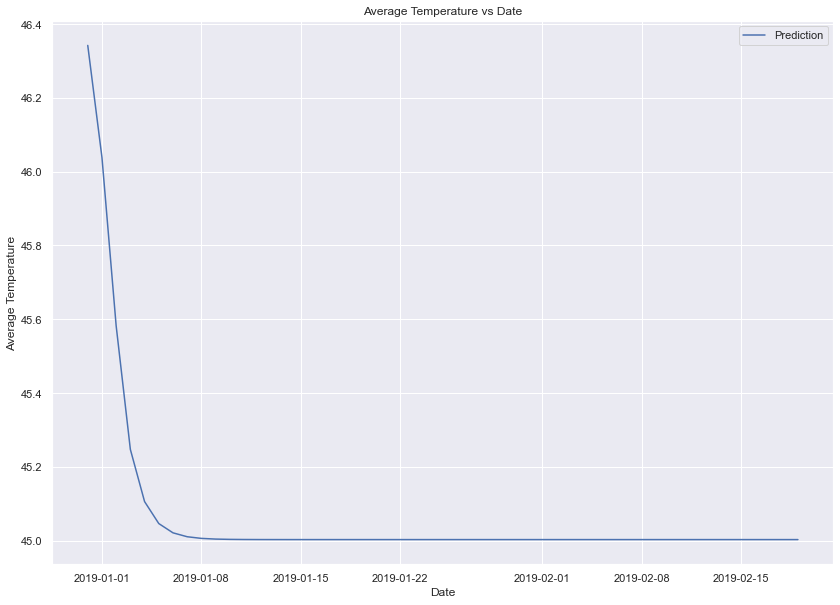

In [145]:
plt.figure(figsize = (14,10))
plt.plot(prediction, label = 'Prediction')
plt.xlabel('Date')
plt.ylabel("Average Temperature")
plt.legend()
plt.title("Average Temperature vs Date")


### Time Series Forecasting using ML models
We will see how well our model predicts using ML models like Linear Regressiona and Random Forest

### 1) Regression

In [146]:
data.dtypes

MinTemp    float64
MaxTemp    float64
AvgTemp    float64
Sunrise      int64
Sunset       int64
dtype: object

In [178]:
x = data.drop(['AvgTemp'], axis = 1)
y = data['AvgTemp']

In [179]:
X_train, X_test, y_train, y_test = train_test_split(x,y, train_size = 0.7, random_state = 42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1274, 4) (1274,) (547, 4) (547,)


In [157]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
reg

train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)
print("Train Score: {}, Test Score: {}".format(train_score, test_score) )

Train Score: 0.9964305203586686, Test Score: 0.9962189112710111


#### Prediction

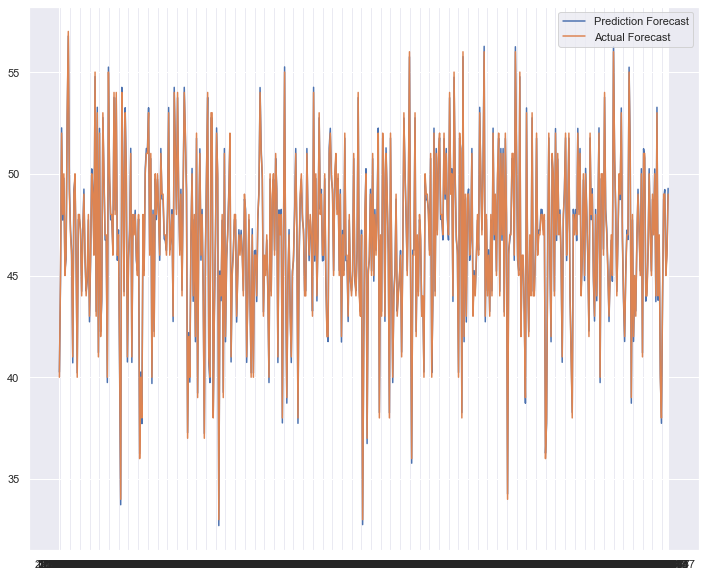

In [180]:
#Prediction on testing set
predict = reg.predict(X_test)
plt.figure(figsize=(12,10))
plt.plot(predict, label = "Prediction Forecast")
plt.plot(y_test, label = "Actual Forecast")
plt.legend()
plt.show()

We can see that our acutal forecasted values are equal to predicted forecasted values. Hence, if we provide our model with future values then it will give us perfect results